# Predictive Modeling of Shipment Pricing Using Machine Learning Regression Algorithms

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

plt.style.use('seaborn-v0_8-darkgrid')
import warnings
warnings.filterwarnings('ignore') 
pd.pandas.set_option('display.max_columns', None) 

In [2]:
data = pd.read_excel('Shipment_Data.xlsx') 
data.head() 

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-07-06 00:00:00,2015-03-06 00:00:00,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-06-03 00:00:00,2017-05-03 00:00:00,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-09-03 00:00:00,2015-08-03 00:00:00,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [3]:
data.shape 

(6500, 20)

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [5]:
data.describe() 

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [6]:
data.isna().sum() 

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

1. There are 7 columns which has null values

In [7]:
target = 'Cost' 

#### Seperating Numerical and Categorical columns

In [8]:
# define numerical & categorical columns
num_cols = [col for col in data.columns if data[col].dtype != 'O']
categorical_cols = [col for col in data.columns if data[col].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical features : {}'.format(len(categorical_cols), categorical_cols))

We have 7 numerical features : ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']

We have 13 categorical features : ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


### Univariate Analysis

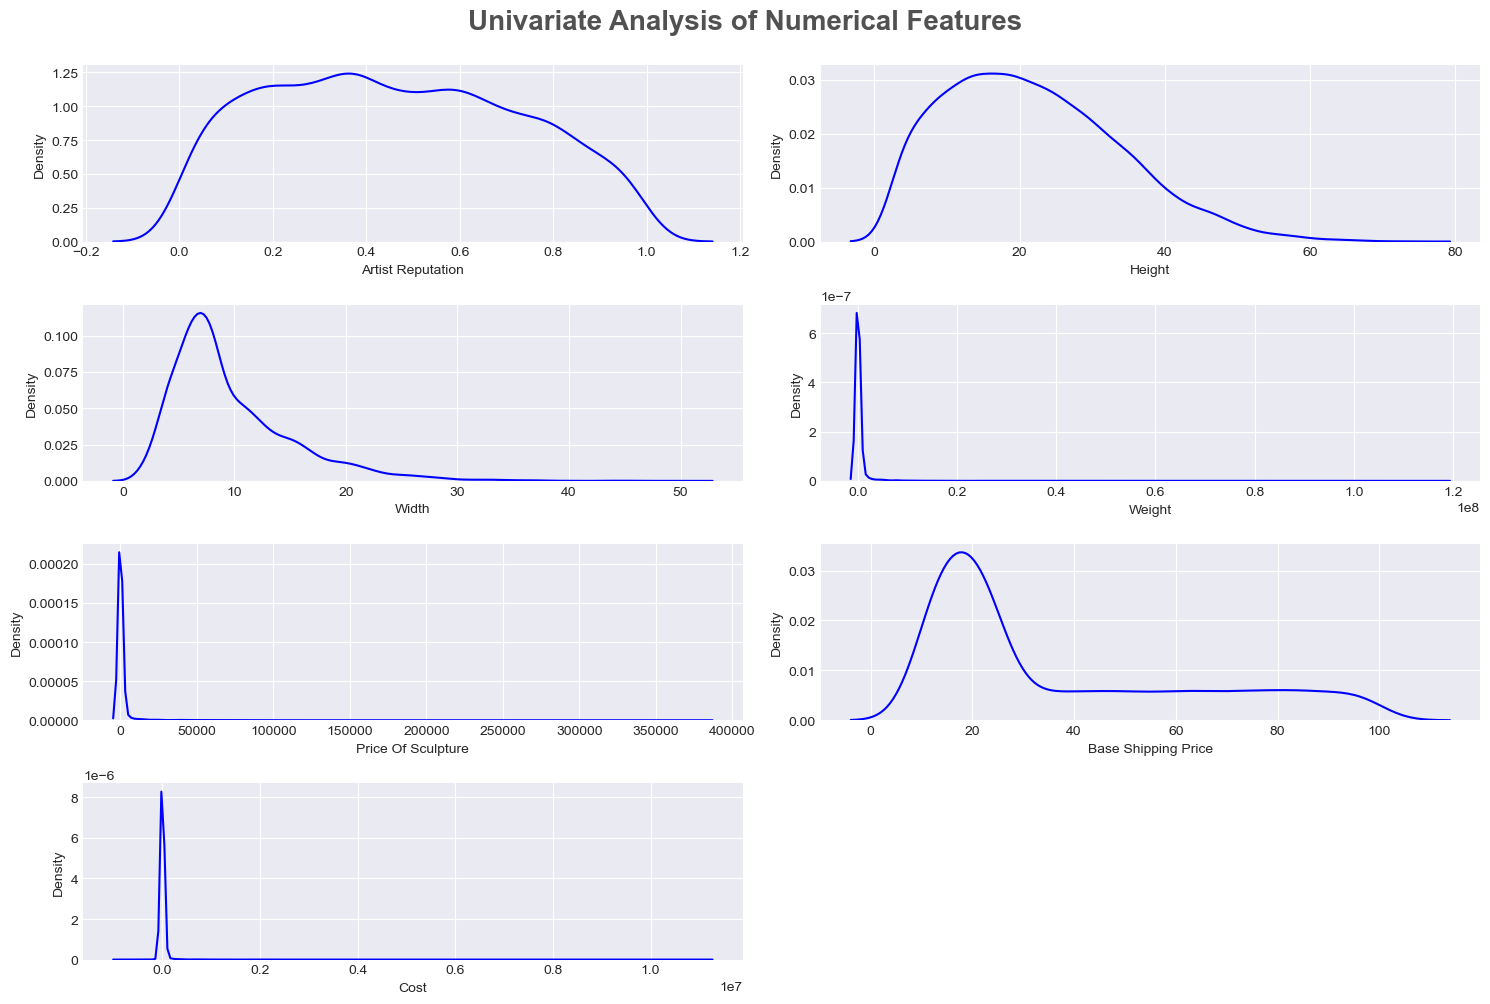

In [9]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=data[num_cols[i]], color='blue')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

1. Weight and Price of Sculpture has many outliers

In [10]:
categorical_columns = []
for i in categorical_cols:
    print(f'{i}: {len(data[i].unique())}')
    if len(data[i].unique()) < 10:
        categorical_columns.append(i) 

Customer Id: 6500
Artist Name: 6449
Material: 8
International: 2
Express Shipment: 2
Installation Included: 2
Transport: 4
Fragile: 2
Customer Information: 2
Remote Location: 3
Scheduled Date: 1660
Delivery Date: 1664
Customer Location: 6500


1. Customer Id, Artist Name, Customer Location have around 6500 unique values, so, they can be dropped

2. Scheduled Date and Delivery Date requires feature engineering

In [11]:
categorical_columns 

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location']

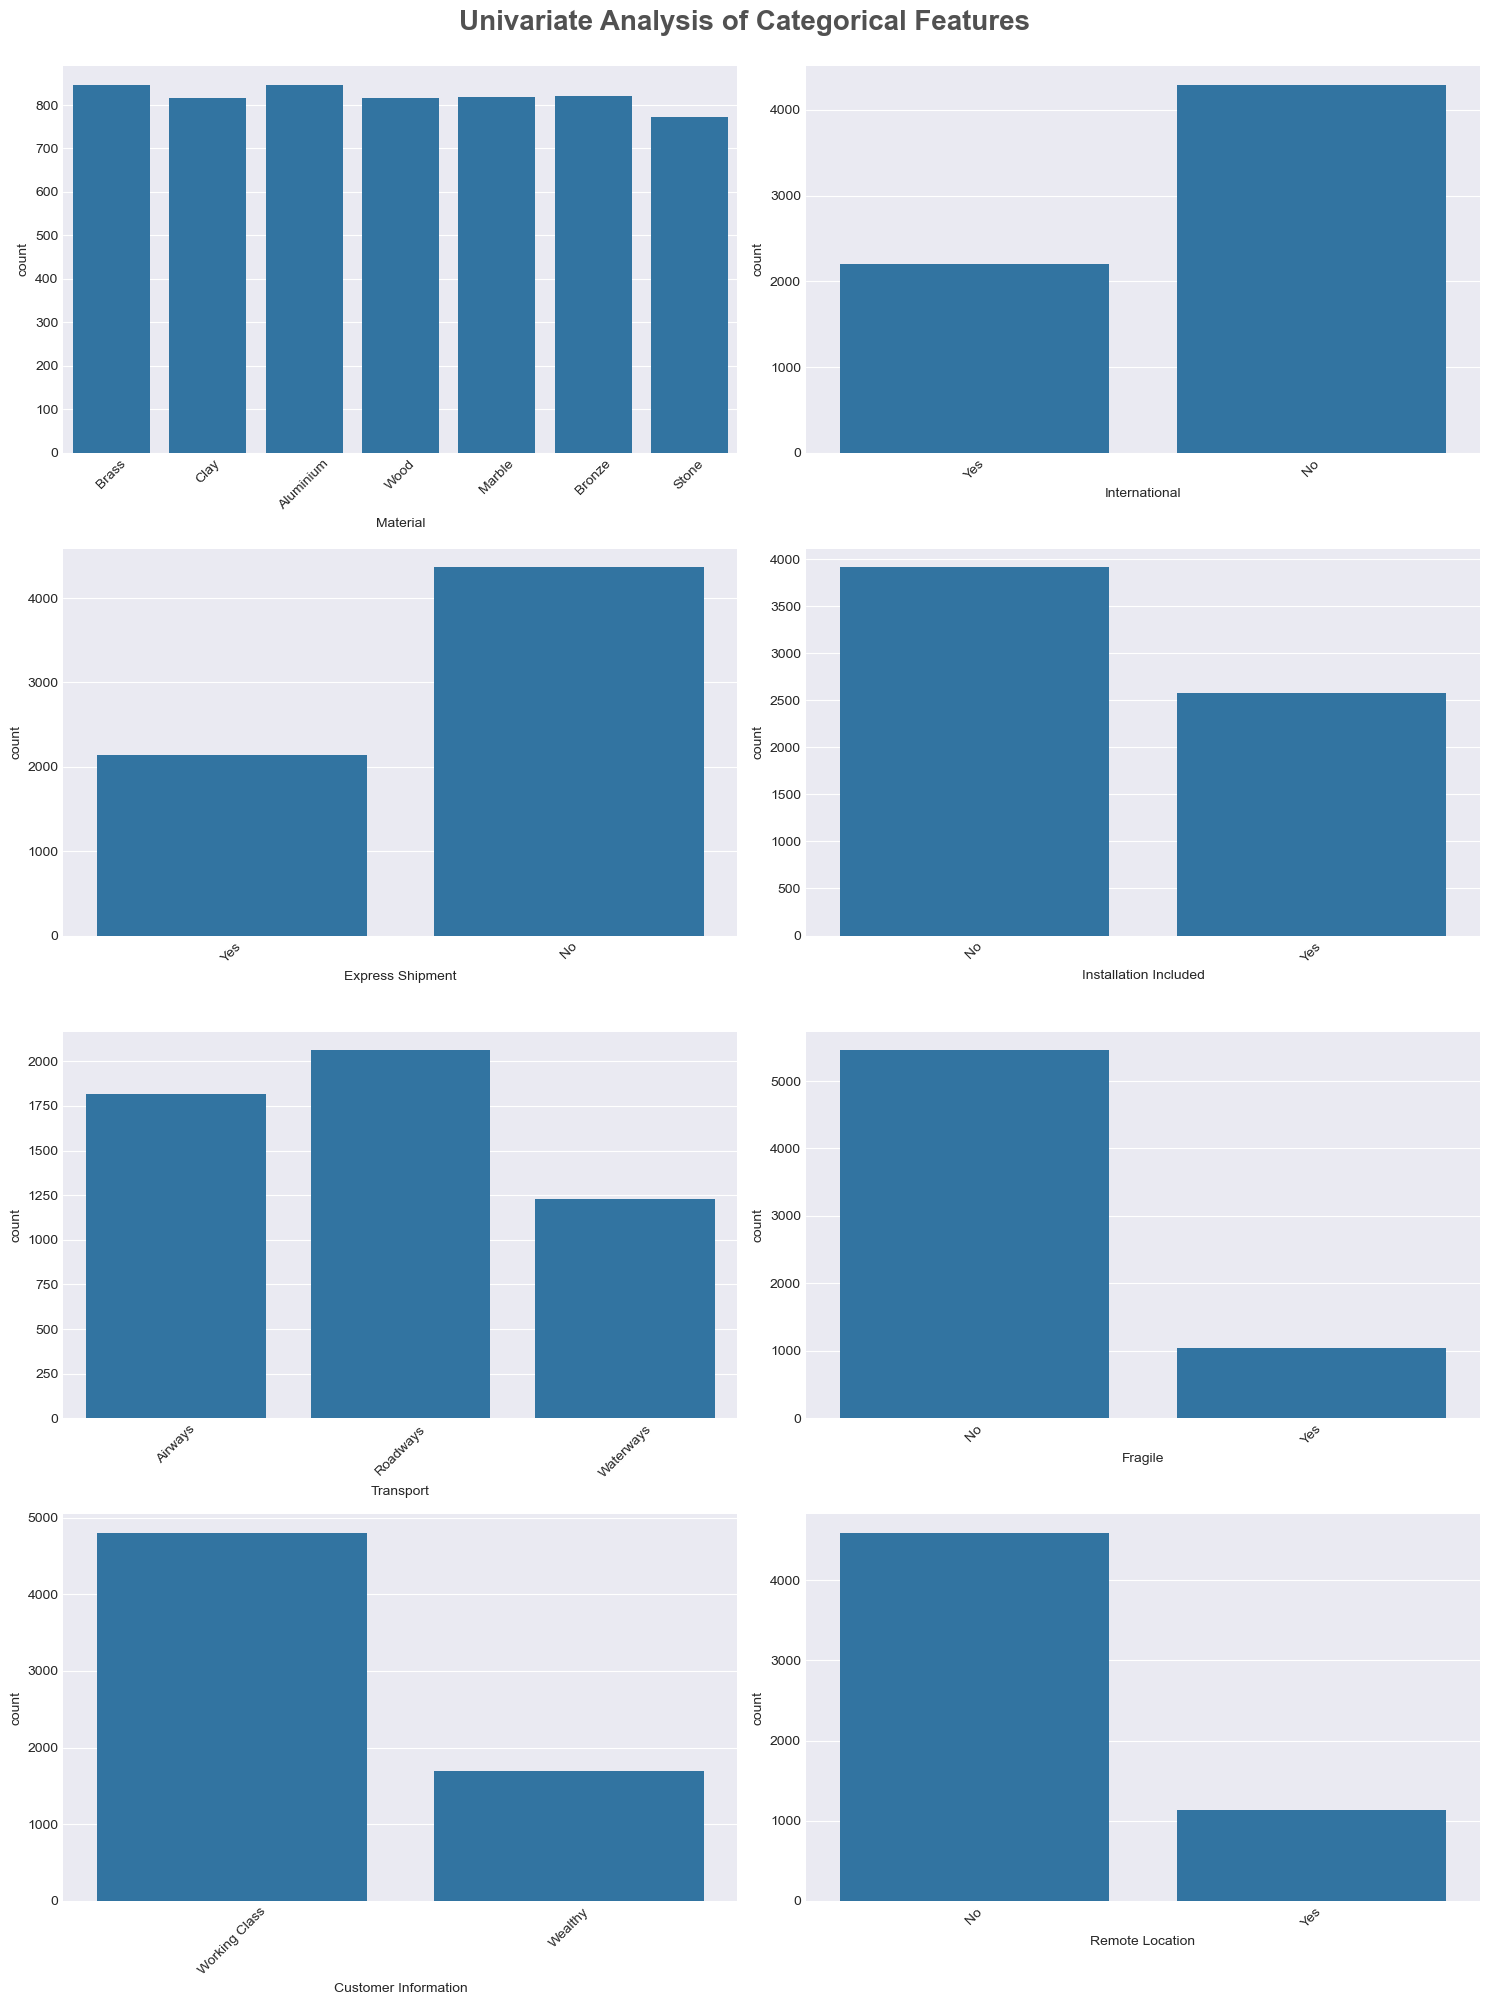

In [12]:
# categorical columns
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_columns)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=data[categorical_columns[i]])
    plt.xlabel(categorical_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

## Multivariate Analysis

#### Correlation in Numeraical Features

In [13]:
data[num_cols].corr() 

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.067368
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.106047
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.158159
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.417263
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.476231
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.053068
Cost,0.067368,0.106047,0.158159,0.417263,0.476231,0.053068,1.000000


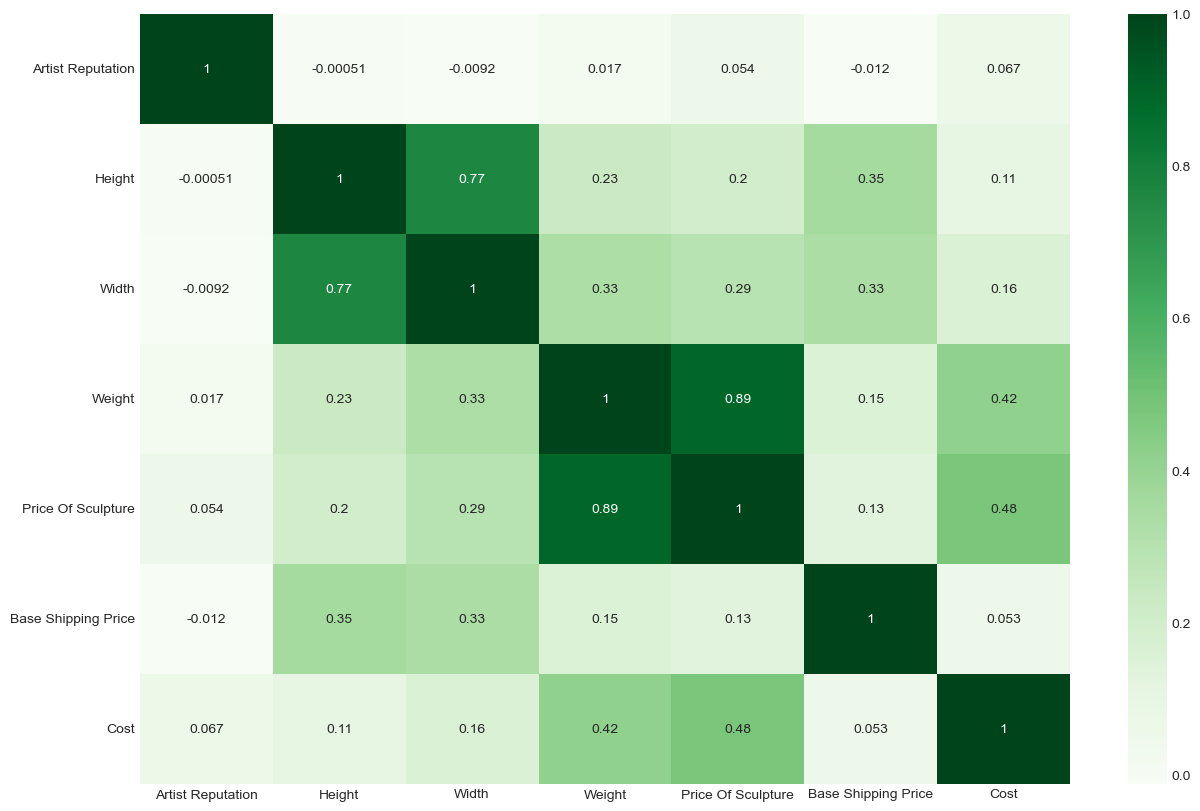

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(data[num_cols].corr(), cmap="Greens", annot=True)
plt.show()

Highest correlation is between Height-Width and Weight-Price of Sculpture

#### Relationship between Target and Numerical Columns

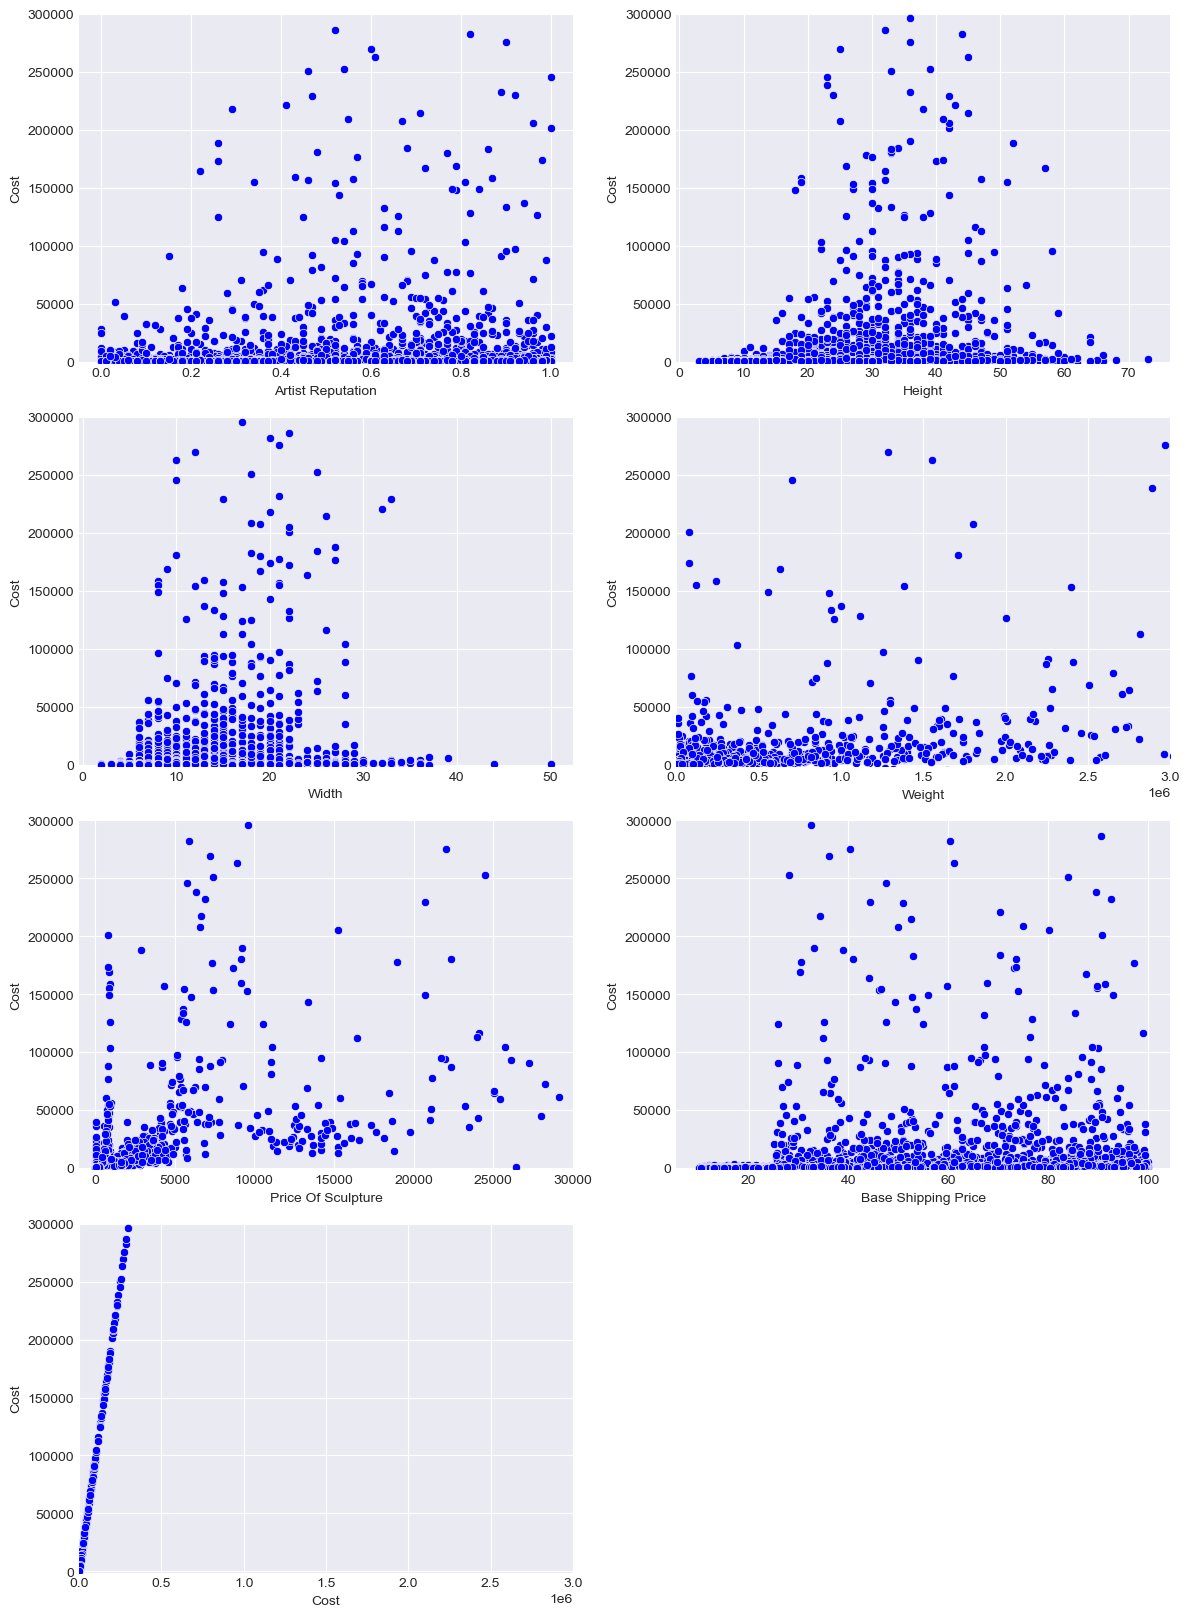

In [15]:
fig = plt.figure(figsize=(12, 24))

for i in range(0, len(num_cols)):
    ax = plt.subplot(6, 2, i+1)
    sns.scatterplot(data= data ,y=target, x=num_cols[i], color='b')
    if data[num_cols[i]].max() > 30000:
        plt.xlim(-1000,30000)
    if data[num_cols[i]].max() > 3000000:
        plt.xlim(-1000,3000000)
    plt.ylim(-1000, 300000)
    plt.tight_layout()

1. We can observe that there is very low linear relationship between the independent and dependent features

2. There seems to be a linear relationship between Price of Sculpture and Target Column

## Visualizing Independent Columns

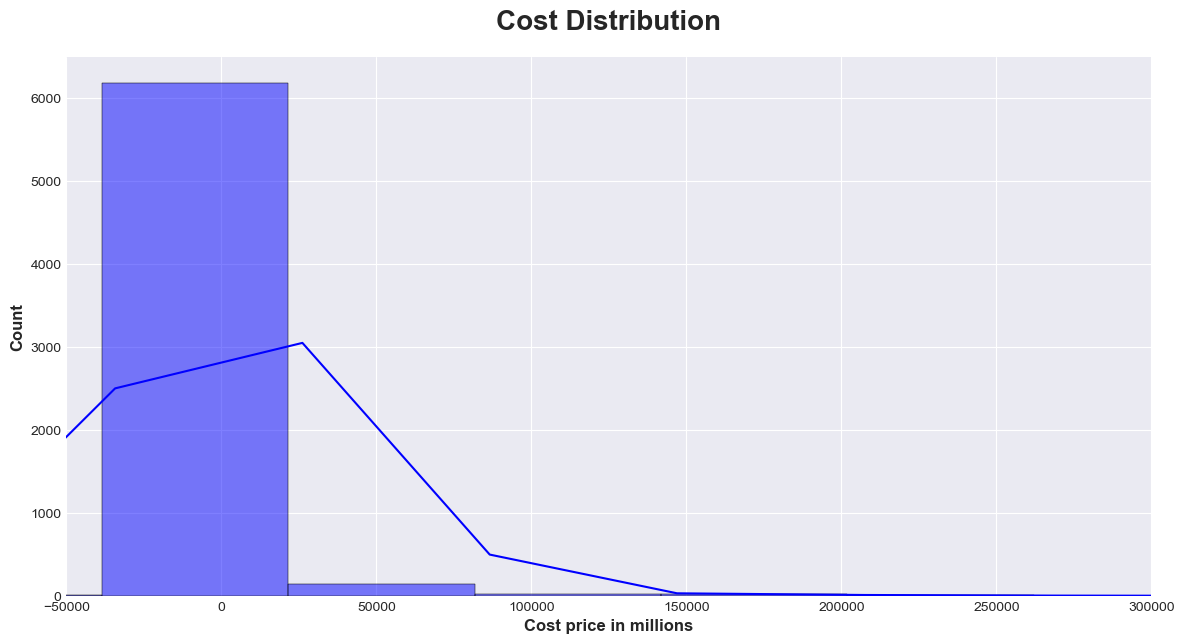

In [16]:
plt.subplots(figsize=(14,7))
sns.histplot(data[target], bins=200, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.xlim(-50000,300000)
plt.show()

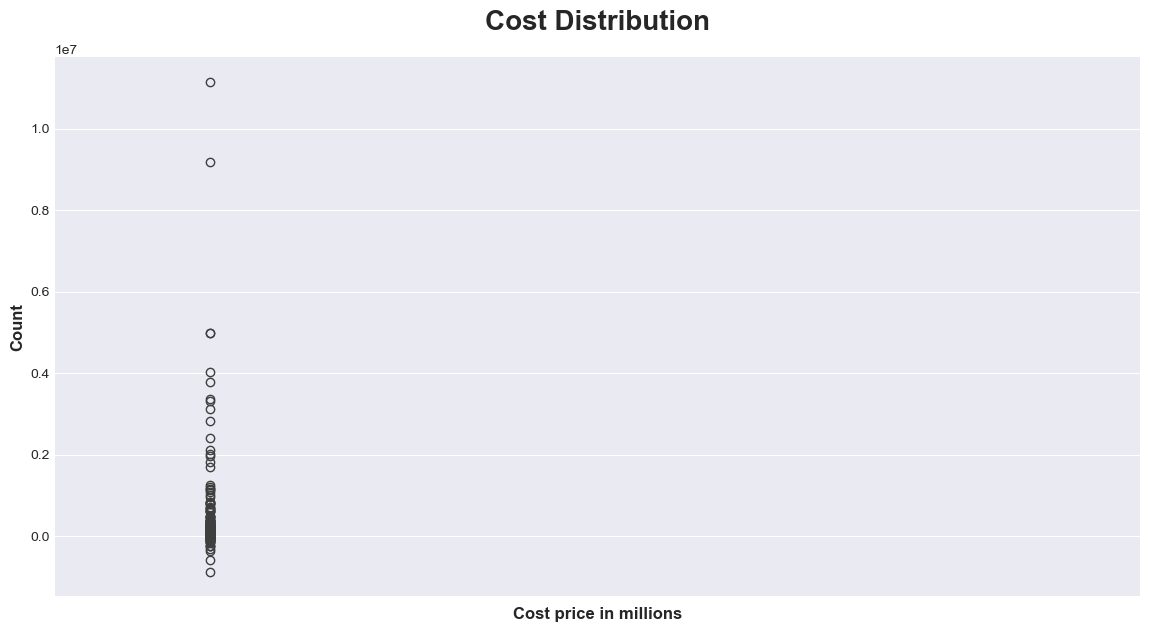

In [17]:
plt.subplots(figsize=(14,7))
sns.boxplot(data[target])
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.xlim(-50000,300000);

There are outliers in the target feature and we need to transform

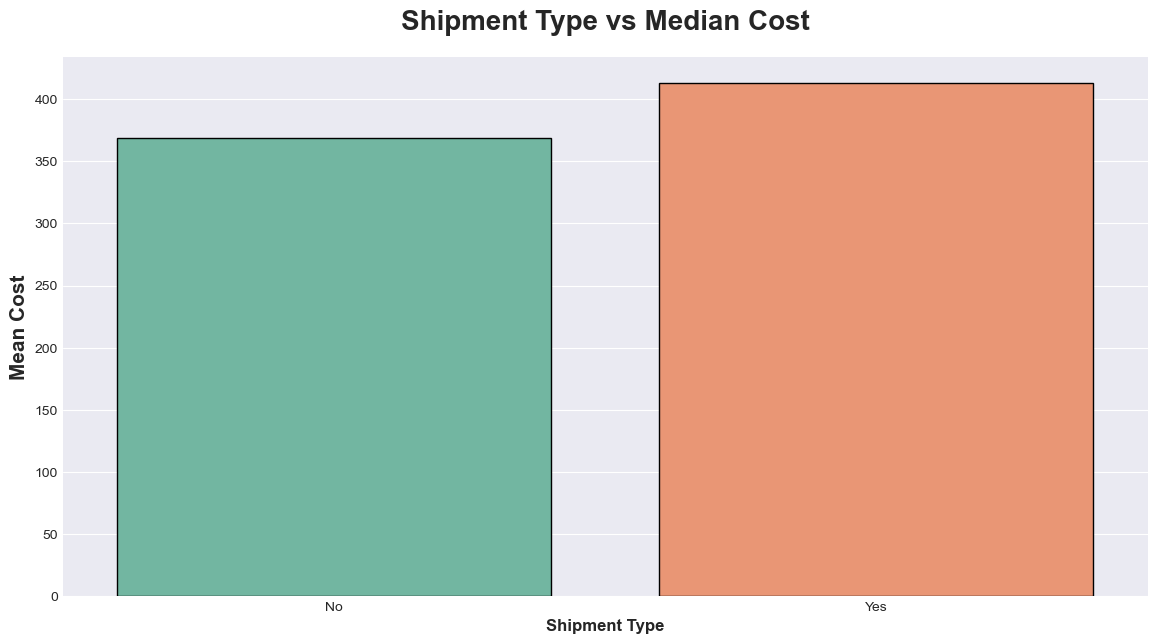

In [18]:
international = data.groupby('International')[target].median()
international.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=international.index, y=international.values, ec = "black", palette="Set2")
plt.title("Shipment Type vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Shipment Type", weight="bold", fontsize=12)
plt.show()

In [19]:
data['International'].value_counts()

International
No     4294
Yes    2206
Name: count, dtype: int64

In [20]:
international_shipment_median = data[data['International'] == 'Yes']['Cost'].median()
domestic_shipment_median = data[data['International'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of International and domestic is {international_shipment_median-domestic_shipment_median}")

The difference between the median shipment price of International and domestic is 43.91500000000008


1. Mode of shipment is not affecting the shipping cost considerably

2. There is more domestic shipments than international

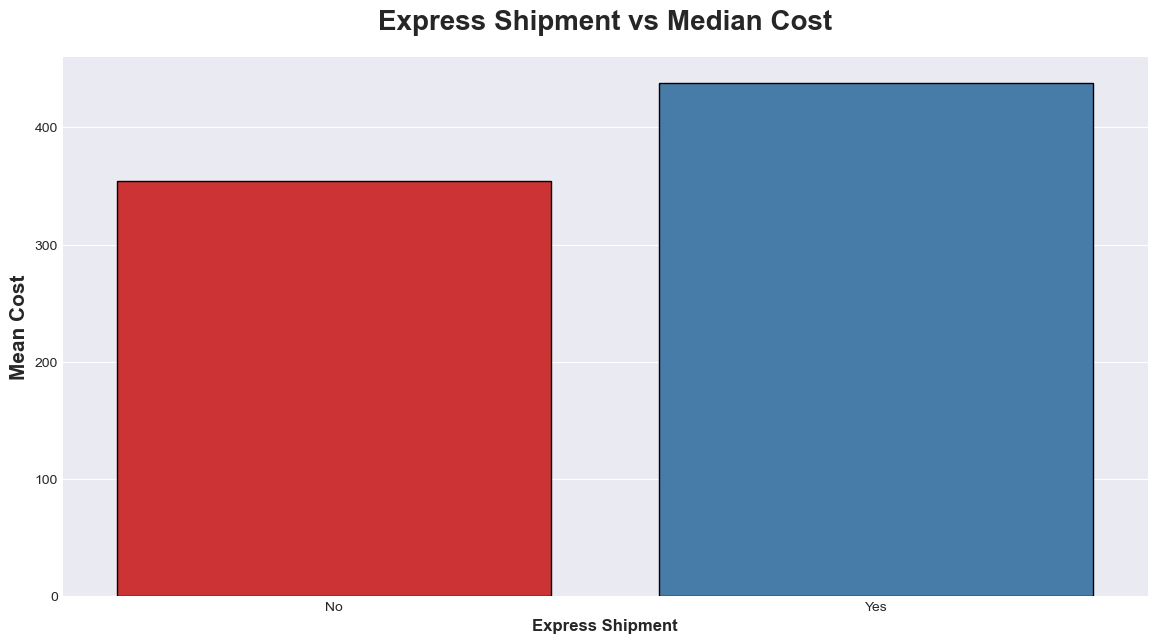

In [21]:
express_ship = data.groupby('Express Shipment')[target].median()
express_ship.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=express_ship.index, y=express_ship.values, ec = "black", palette="Set1")
plt.title("Express Shipment vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Express Shipment", weight="bold", fontsize=12)
plt.show()

In [22]:
data['Express Shipment'].value_counts()

Express Shipment
No     4365
Yes    2135
Name: count, dtype: int64

In [23]:
express_shipment_median = data[data['Express Shipment'] == 'Yes']['Cost'].median()
normal_shipment_median = data[data['Express Shipment'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of express shipment and normal shipment is {express_shipment_median-normal_shipment_median}")

The difference between the median shipment price of express shipment and normal shipment is 83.08000000000004


1. In express shipment, there is no considerable cost difference between domestic and international

2. It is now clear that there are more normal delivery than express

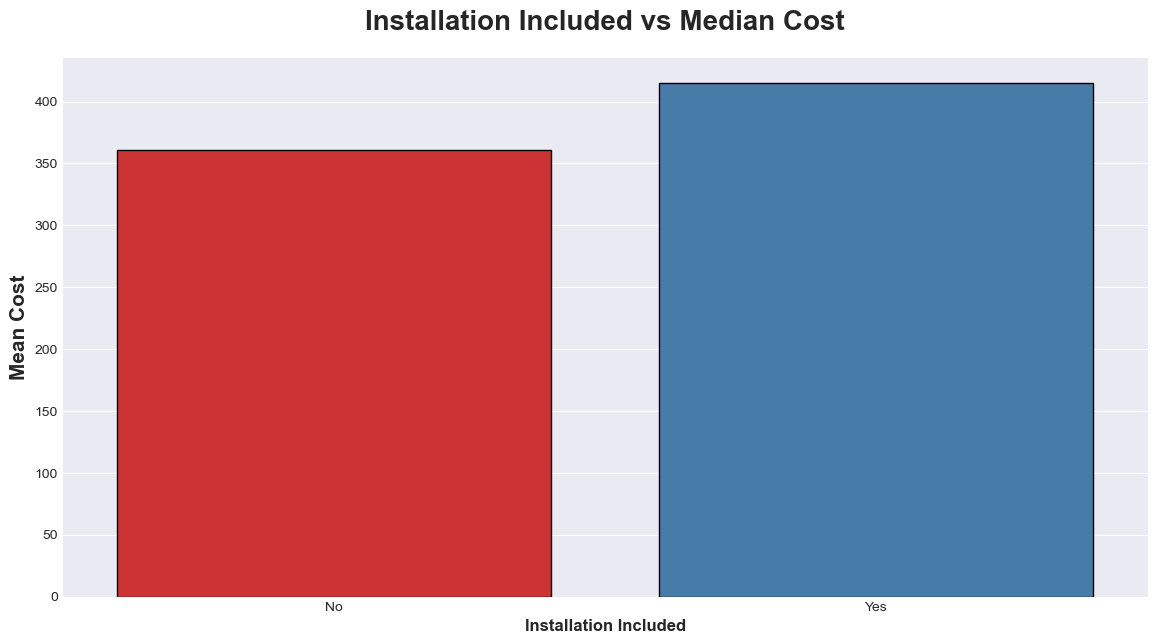

In [24]:
installation = data.groupby('Installation Included')[target].median()
installation.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=installation.index, y=installation.values, ec = "black", palette="Set1")
plt.title("Installation Included vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Installation Included", weight="bold", fontsize=12)
plt.show()

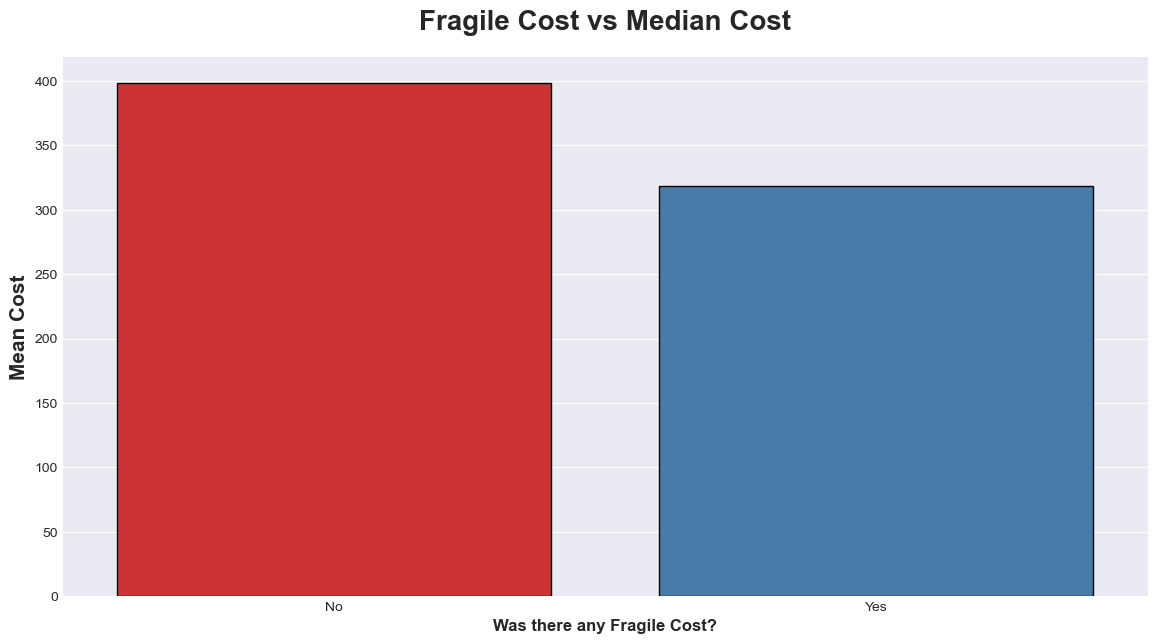

In [25]:
fragile = data.groupby('Fragile')[target].median()
fragile.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=fragile.index, y=fragile.values, ec = "black", palette="Set1")
plt.title("Fragile Cost vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was there any Fragile Cost?", weight="bold", fontsize=12)
plt.show()

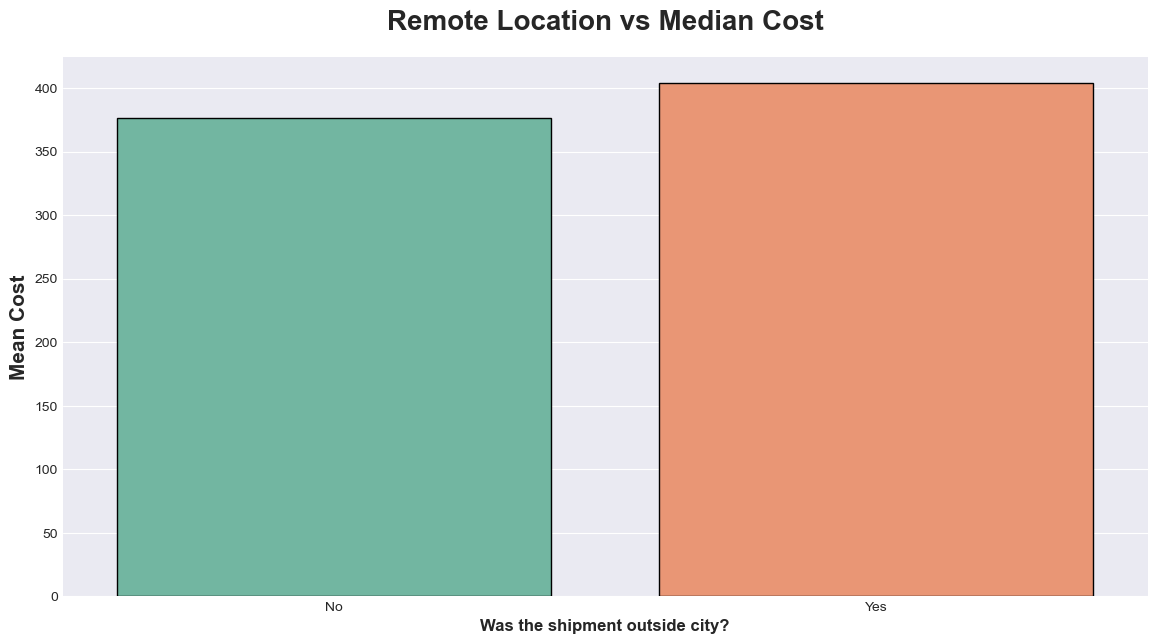

In [26]:
remote = data.groupby('Remote Location')[target].median()
remote.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=remote.index, y=remote.values, ec = "black", palette="Set2")
plt.title("Remote Location vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was the shipment outside city?", weight="bold", fontsize=12)
plt.show()

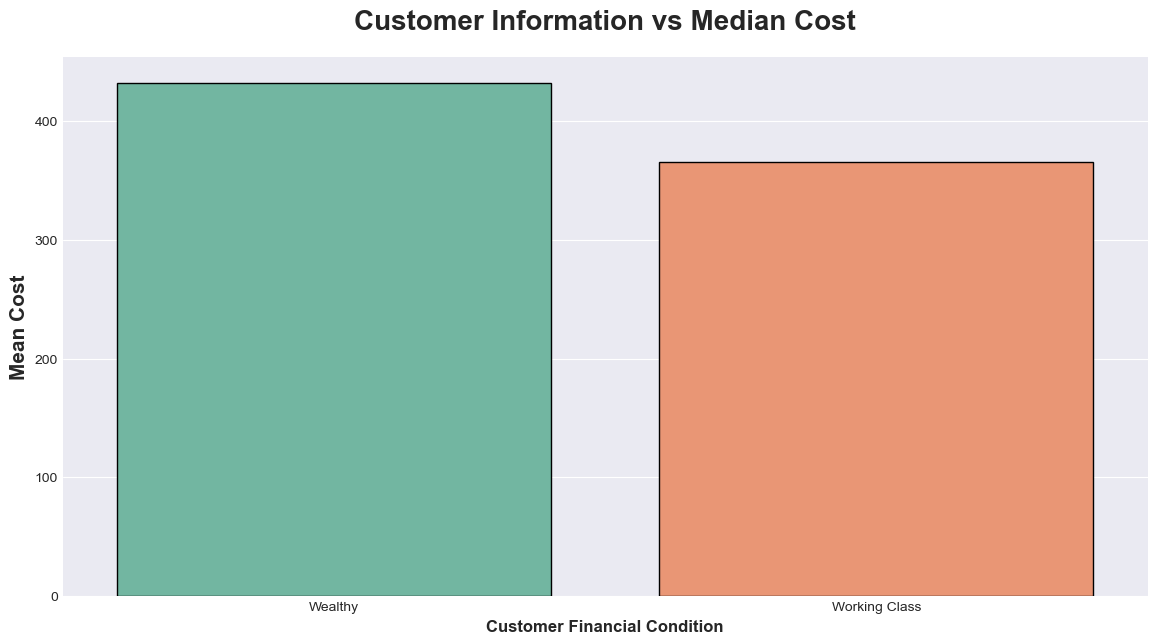

In [27]:
cust_info = data.groupby('Customer Information')[target].median()
cust_info.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=cust_info.index, y=cust_info.values, ec = "black", palette="Set2")
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

<font size=3>**Report**</font> 

<font size=3>After understanding relationship between the target column and categorical columns, that there doesn't seem to be much pattern, which model can find in the categorical columns also</font>

## Visualizing Date Columns

In [28]:
data['Scheduled Date'] = pd.to_datetime(data['Scheduled Date'])
data['Delivery Date'] = pd.to_datetime(data['Delivery Date'])

In [29]:
data['year'] = pd.DatetimeIndex(data['Scheduled Date']).year
data['month'] = pd.DatetimeIndex(data['Scheduled Date']).month

In [30]:
x = data.groupby(["year", "month"])["Cost"].mean()
df_wide = x.unstack().T
df_wide.head()

year,2015,2016,2017,2018,2019
month,,,,,
1,11415.697719,12917.314911,11152.621810,53287.186311,2157.270135
2,38345.366075,7546.934259,3702.824400,11439.178600,4200.014444
3,3576.115417,10446.091212,44230.687559,9540.200000,4499.389053
4,89281.912479,4452.801552,25547.715682,4091.033462,7024.156972
5,6659.668120,12974.687143,13670.988806,6708.717222,10256.952903


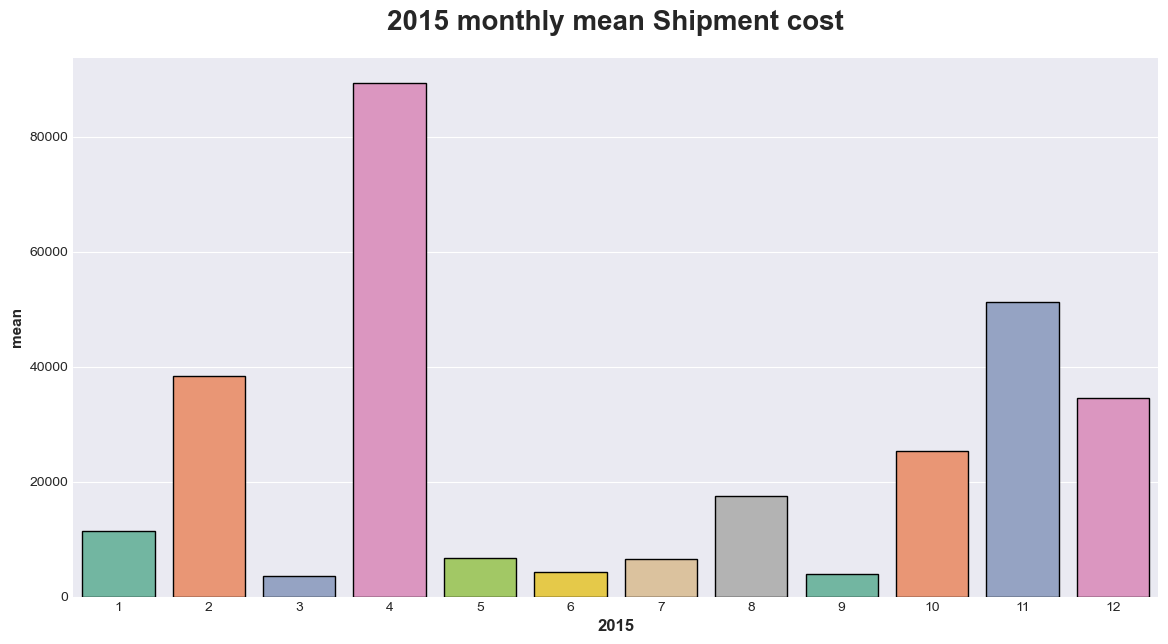

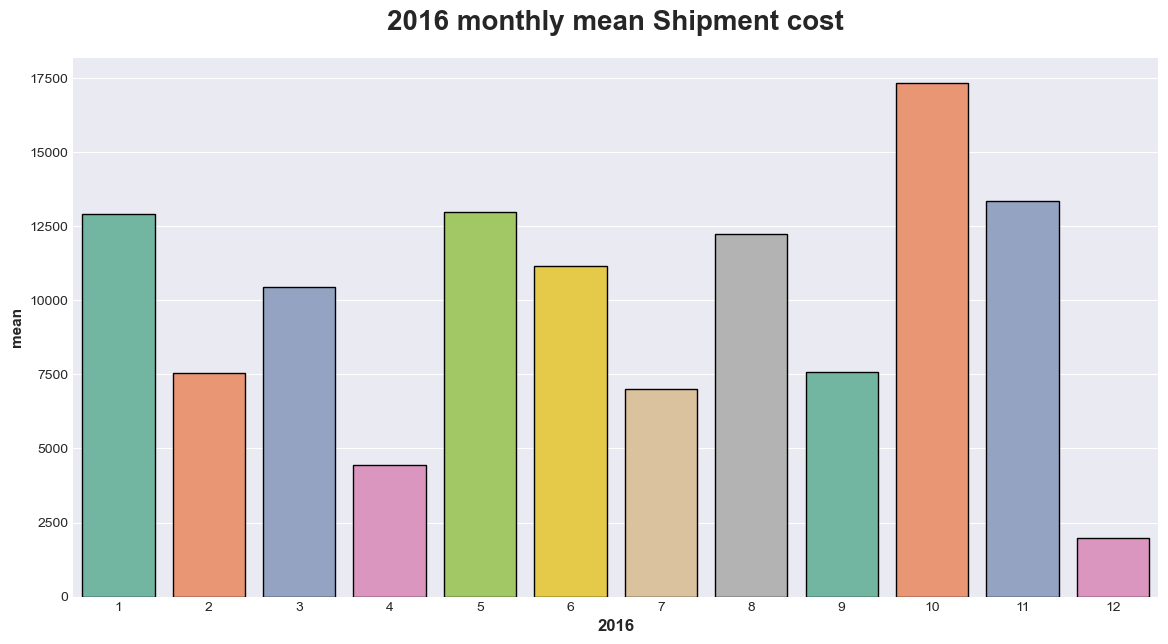

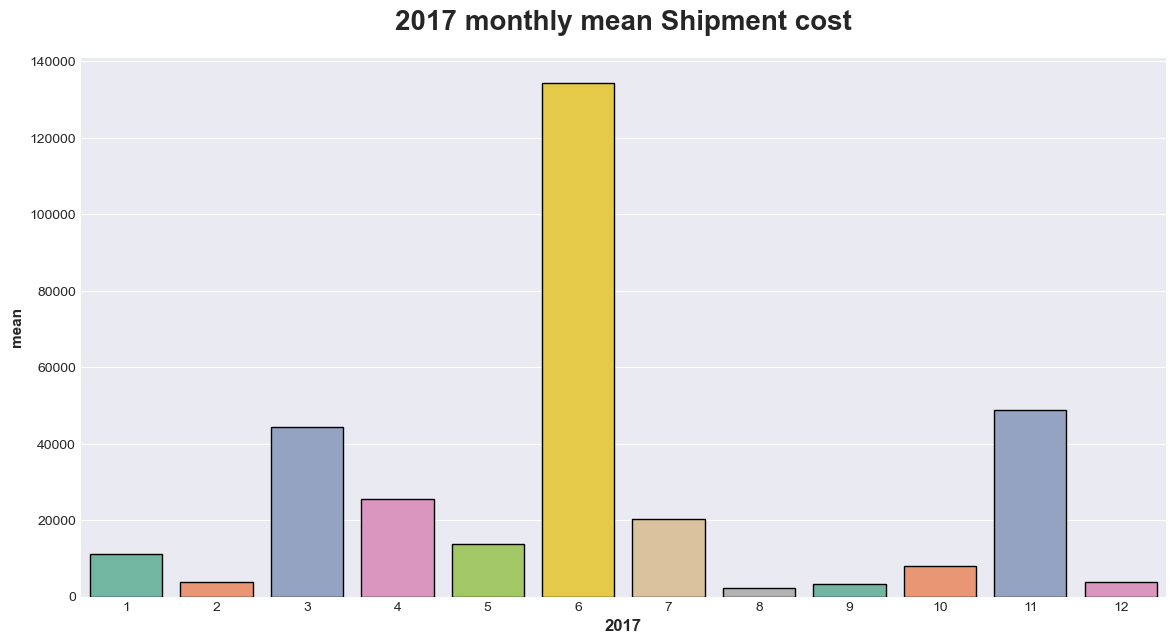

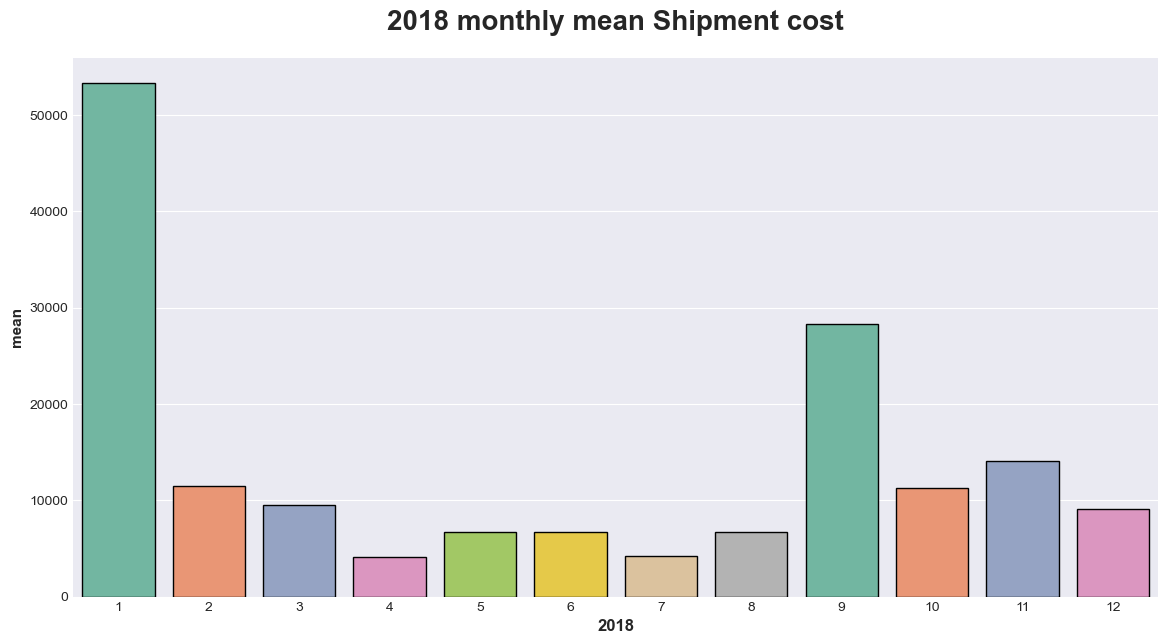

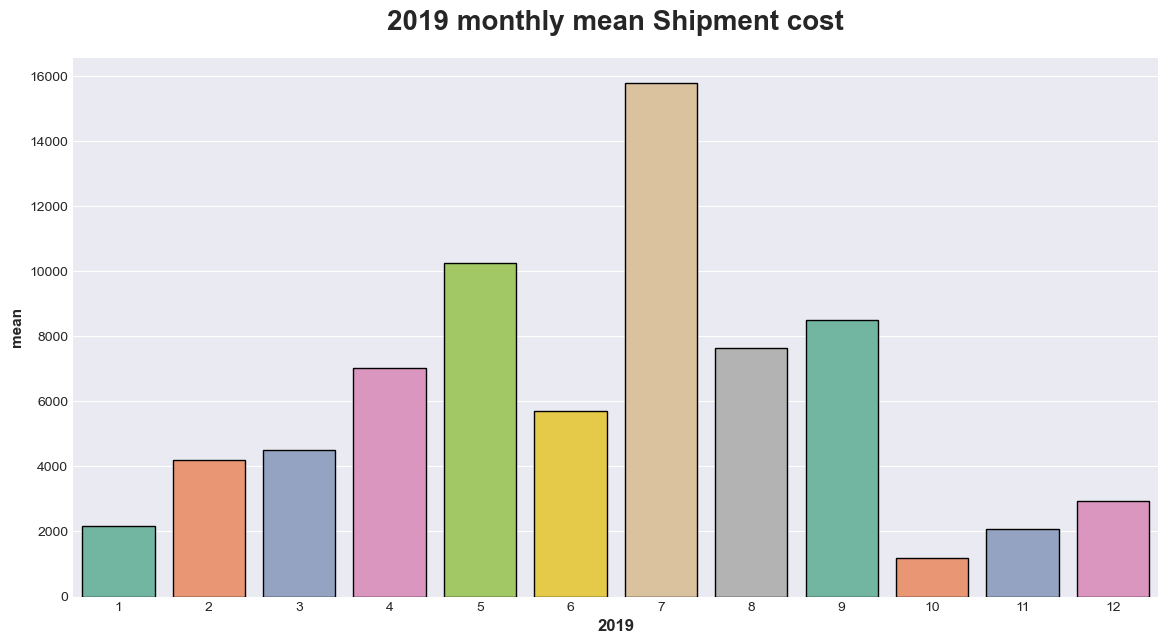

In [31]:
for i in df_wide.columns:
    plt.subplots(figsize=(14,7))
    sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")
    plt.title(str(i) + " monthly mean Shipment cost", weight="bold",fontsize=20, pad=20)
    plt.ylabel("mean", weight="bold", fontsize=11)
    plt.xlabel(i, weight="bold", fontsize=12)
    plt.show()

1. Monthly distribution of every year is different
2. For 2015, 2016 and 2018, There were more cost at the start and end of the year
3. For 2017 and 2019 cost were high mid year

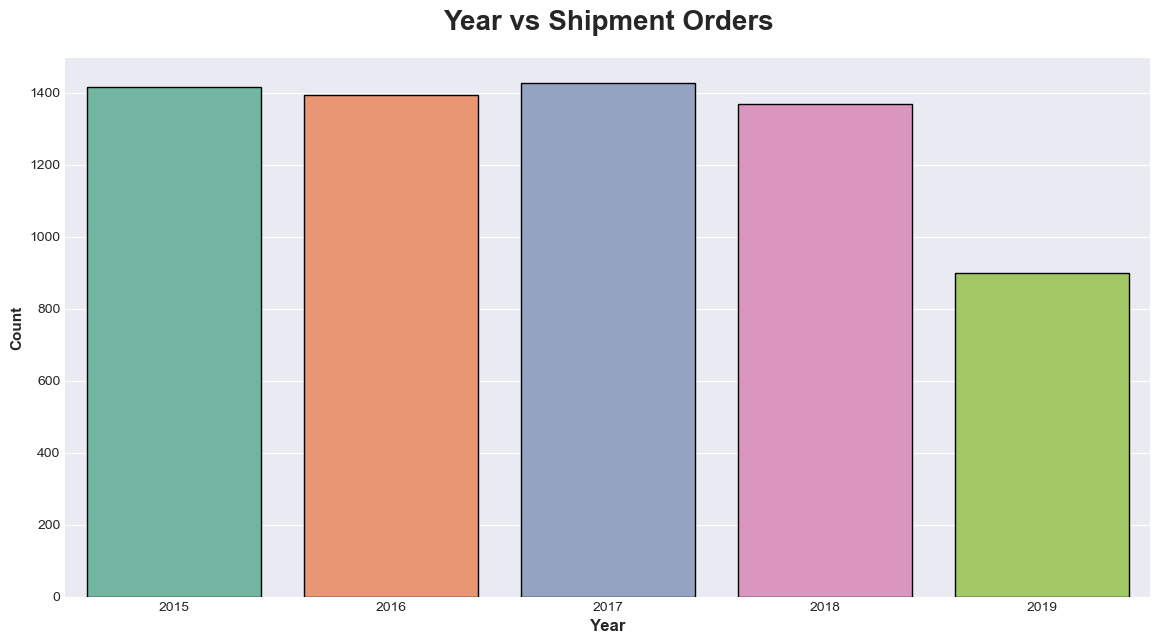

In [32]:
plt.subplots(figsize=(14,7))
sns.countplot(x=data.year,ec = "black", palette="Set2")
plt.title("Year vs Shipment Orders", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=11)
plt.xlabel("Year", weight="bold", fontsize=12)
plt.show()

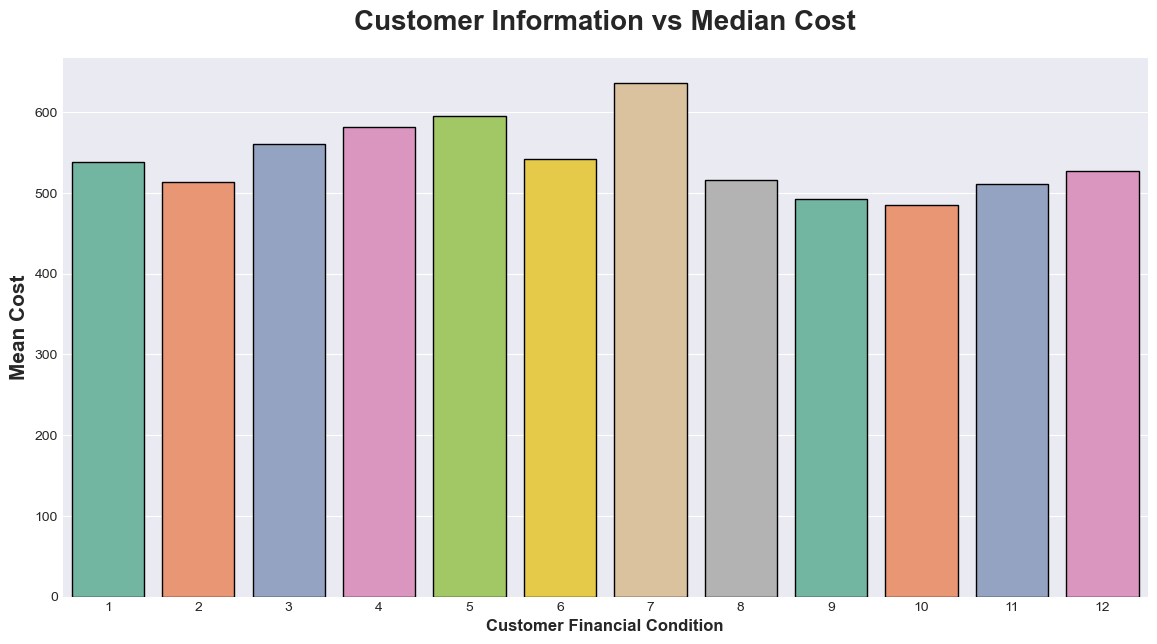

In [33]:
plt.subplots(figsize=(14,7))
sns.countplot(x=data.month,ec = "black", palette="Set2")
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

## Insights

1. `Cost` column is the target for prediction
2. The target variable here is continuous
3. There are outliers in some columns and we need to remove outliers
4. `date` column is configured to extract `year` and `month`
5. Null values in columns `Artist Reputation`, `Height`, `Width`, `Weight`, `Material`, `Transport`, `Remote Location` needs to be handled

# Data Pre-processing

## Data Cleaning

#### Checking Null Values

In [34]:
##these are the features with nan value
features_with_na=[cols for cols in data.columns if data[cols].isnull().sum()>=1]
for cols in features_with_na:
    print(cols,np.round(data[cols].isnull().mean()*100,5), '% missing values')

Artist Reputation 11.53846 % missing values
Height 5.76923 % missing values
Width 8.98462 % missing values
Weight 9.03077 % missing values
Material 11.75385 % missing values
Transport 21.41538 % missing values
Remote Location 11.86154 % missing values


#### Checking for Duplicates

In [35]:
data.duplicated().sum() 

0

## Multicollinearity Check

#### Variance Inflation Factor

In [36]:
df1 = data.copy() 

for i in num_cols:
    df1[i].fillna(df1[i].median(), inplace=True) 

In [37]:
for i in range(0, len(num_cols)):
    x = df1.loc[:, df1.columns == num_cols[i]]
    y = df1.Cost
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            num_cols[i], vif)
        )

Variance Inflation Factor of Artist Reputation column is 1.01 

Variance Inflation Factor of Height column is 1.01 

Variance Inflation Factor of Width column is 1.02 

Variance Inflation Factor of Weight column is 1.2 

Variance Inflation Factor of Price Of Sculpture column is 1.3 

Variance Inflation Factor of Base Shipping Price column is 1.01 

Variance Inflation Factor of Cost column is inf 



All columns has VIF around 1, so, there is no severe multicollinearity

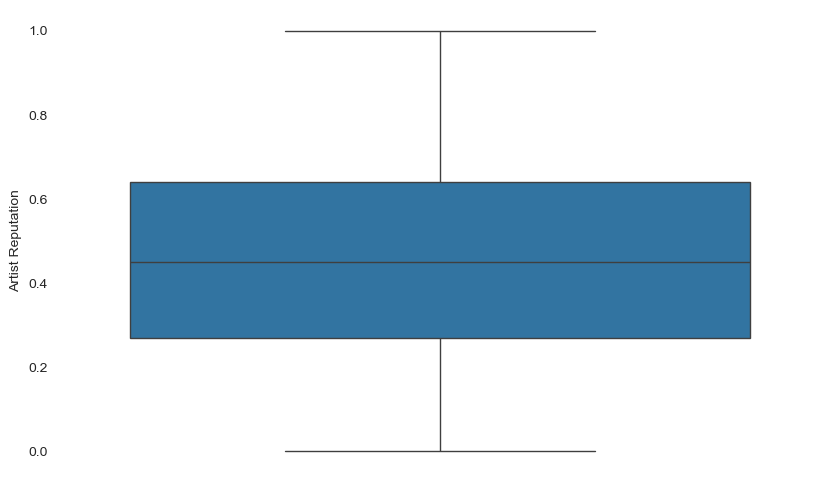

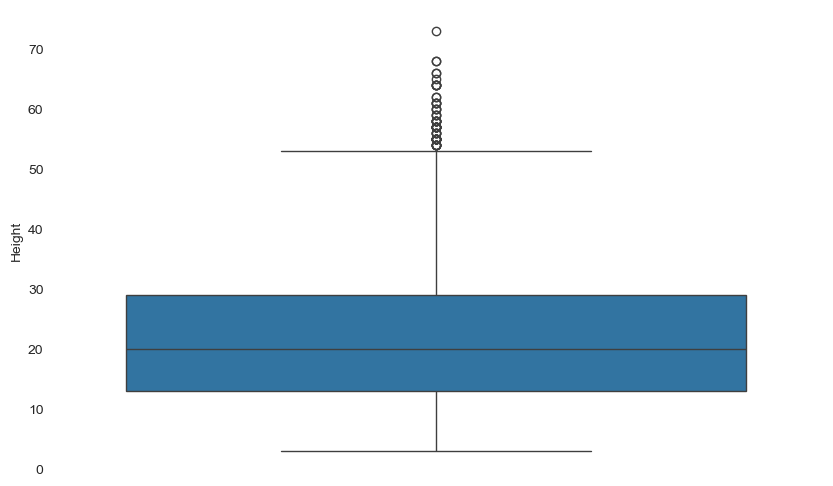

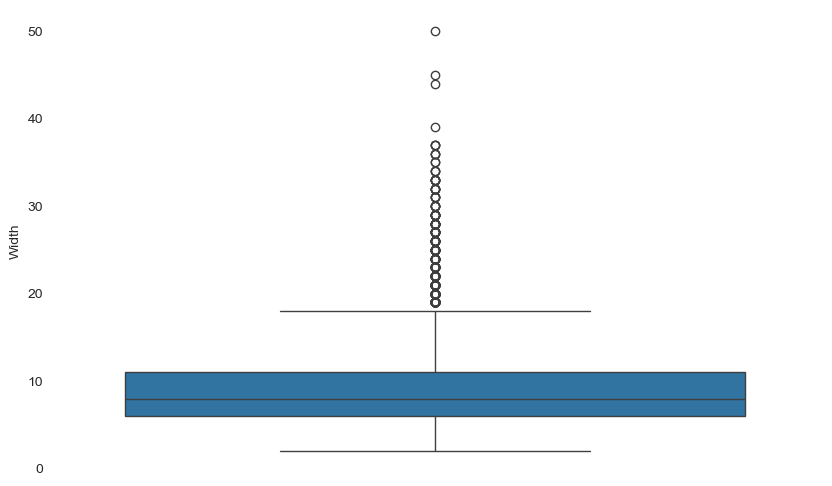

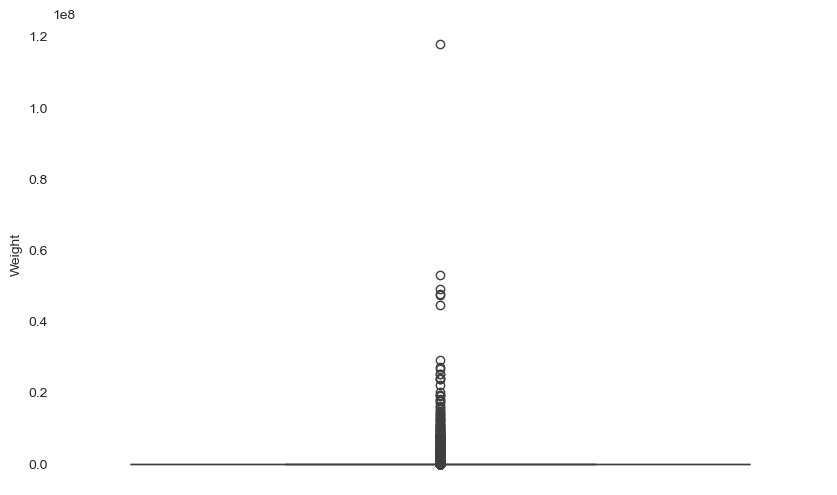

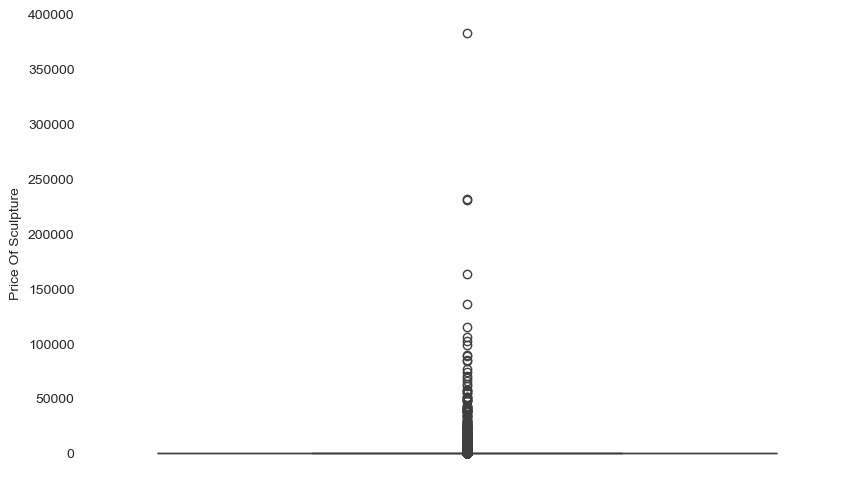

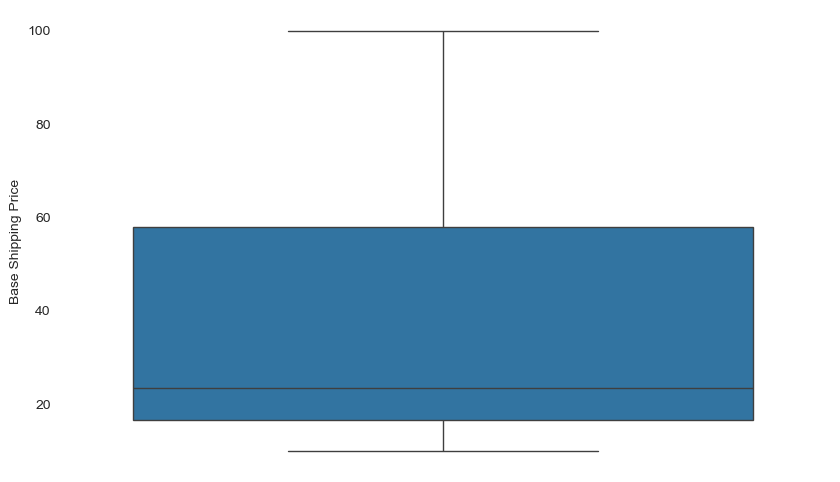

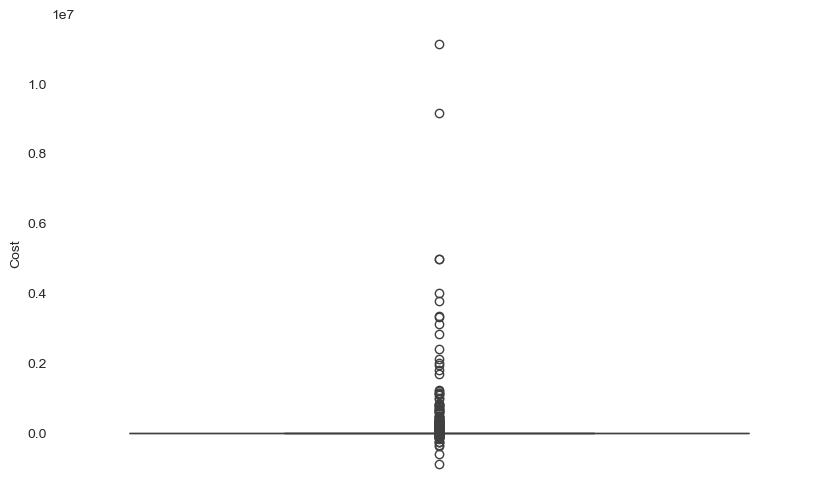

In [38]:
for i in num_cols:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df1[i])

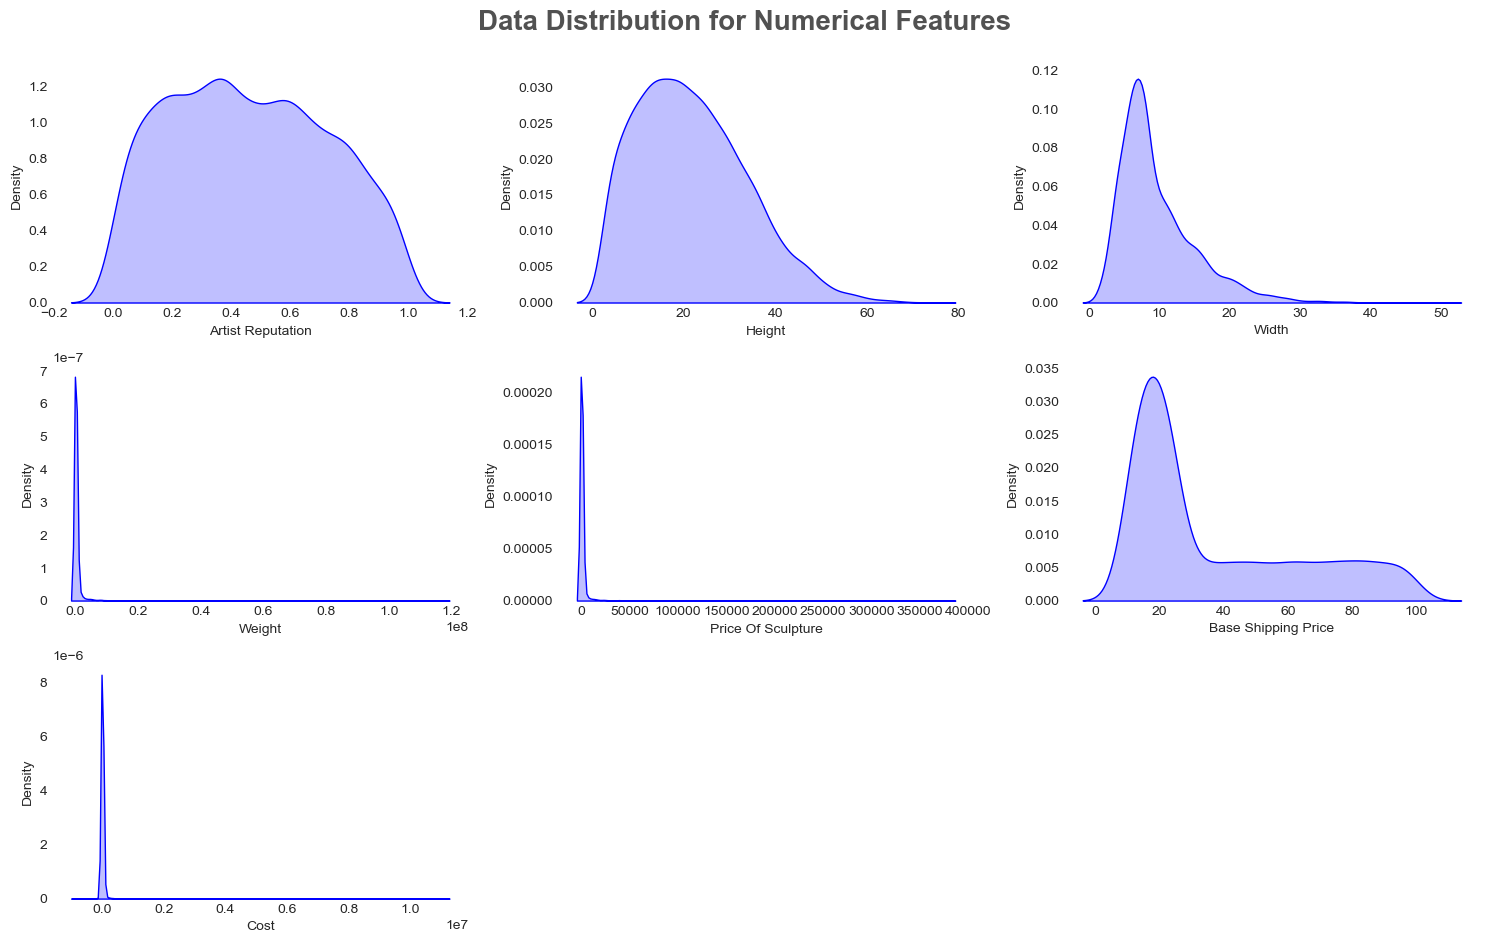

In [39]:
plt.figure(figsize=(15, 15))
plt.suptitle('Data Distribution for Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[num_cols[i]],shade=True, color='b')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

In [40]:
data[num_cols].skew()

Artist Reputation       0.141363
Height                  0.594041
Width                   1.546702
Weight                 21.556174
Price Of Sculpture     22.206823
Base Shipping Price     0.918102
Cost                   29.817459
dtype: float64

1. `Price of Sculpture` and `weight` are extremely positively skewed because of outliers. We can handle them using Power Transformer or Log Transformer
2. `Width` and `Base Shipping Price` are slightly positively skewed but not as severe 

#### Power transformer on outlier columns

In [41]:
outlier_feature = ['Price Of Sculpture', 'Weight']

pt = PowerTransformer(standardize=False)

outlier_data = df1[outlier_feature] 
df1[outlier_feature] = pt.fit_transform(df1[outlier_feature])
df_outlier = pd.DataFrame(outlier_data, columns=outlier_feature) 

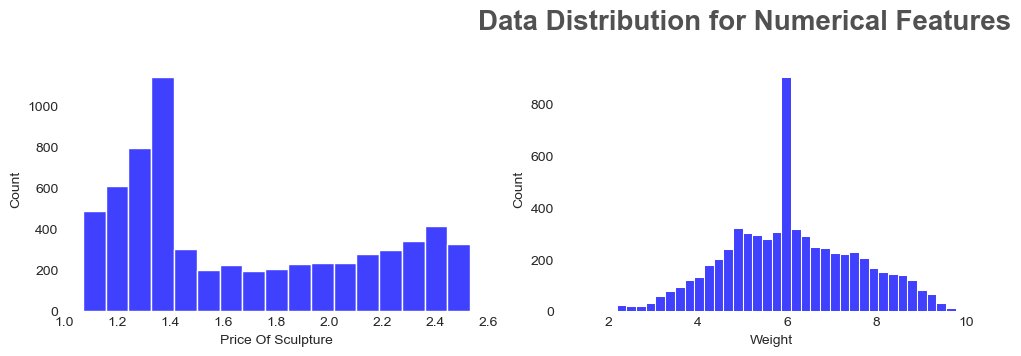

In [42]:
plt.figure(figsize=(15, 15))
plt.suptitle('Data Distribution for Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(outlier_feature)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df1[outlier_feature[i]], color='b')
    plt.xlabel(outlier_feature[i])
    plt.tight_layout() 

In [43]:
df1[outlier_feature].skew() 

Price Of Sculpture    0.478648
Weight                0.027309
dtype: float64

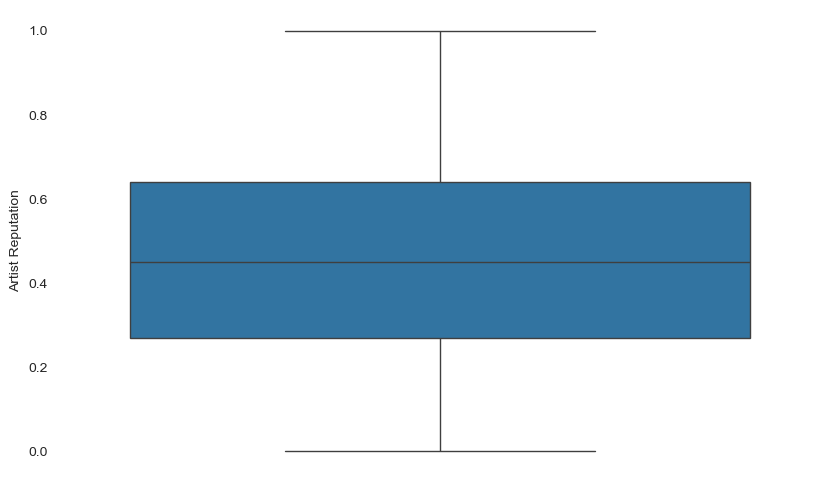

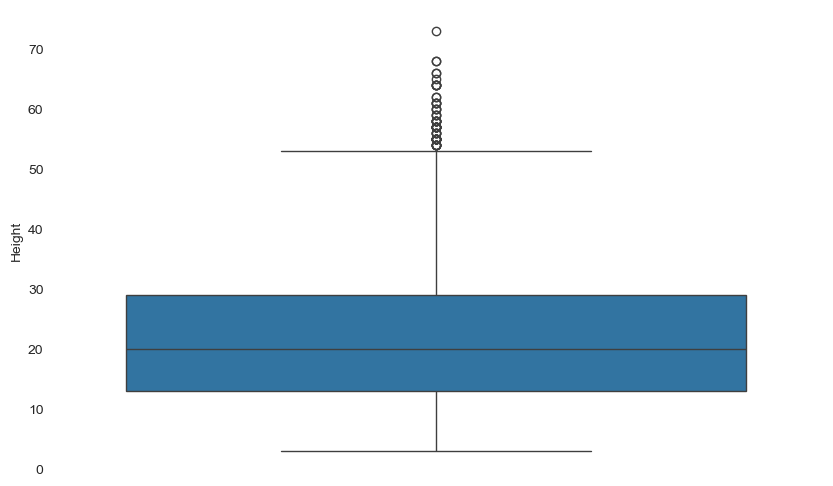

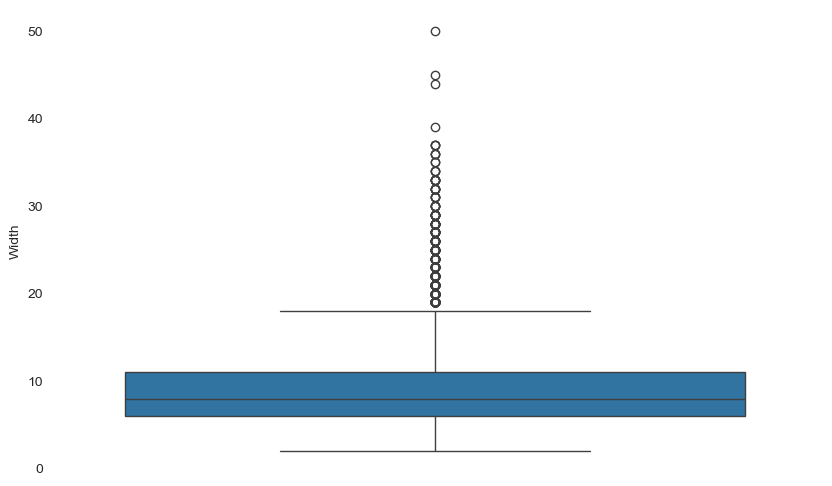

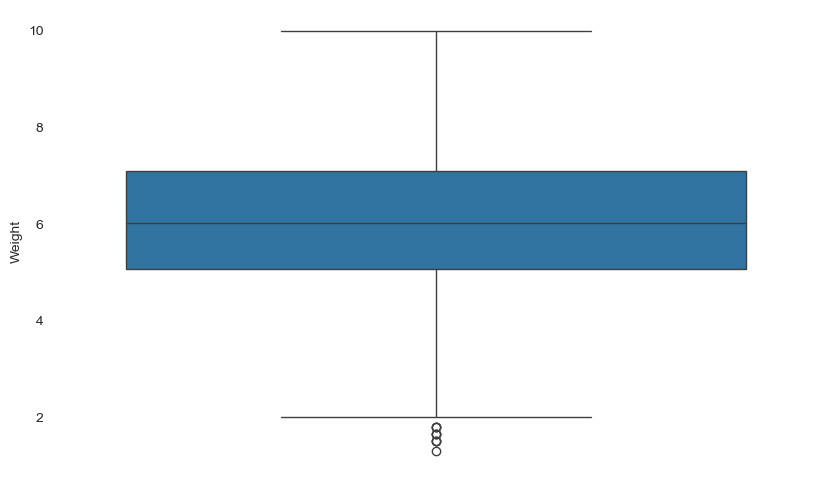

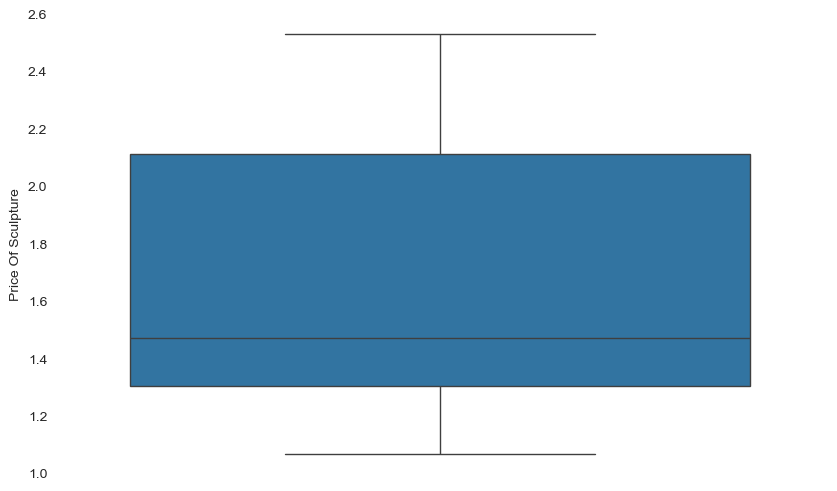

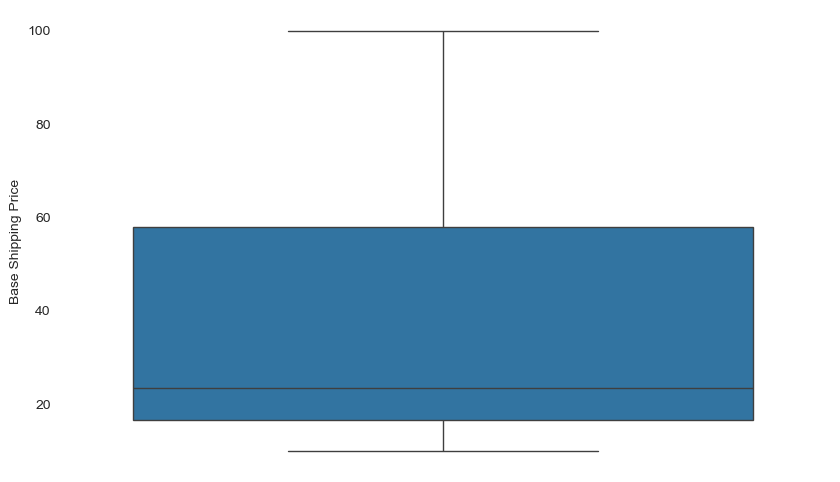

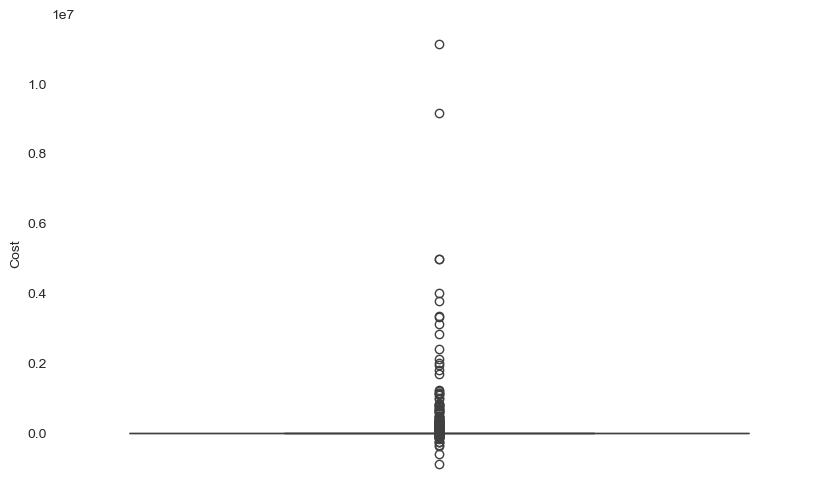

In [44]:
for i in num_cols: 
    plt.figure(figsize=(10,6))
    sns.set_style('ticks')
    ax = sns.boxplot(df1[i])

#### Removing outliers from Target COlumn

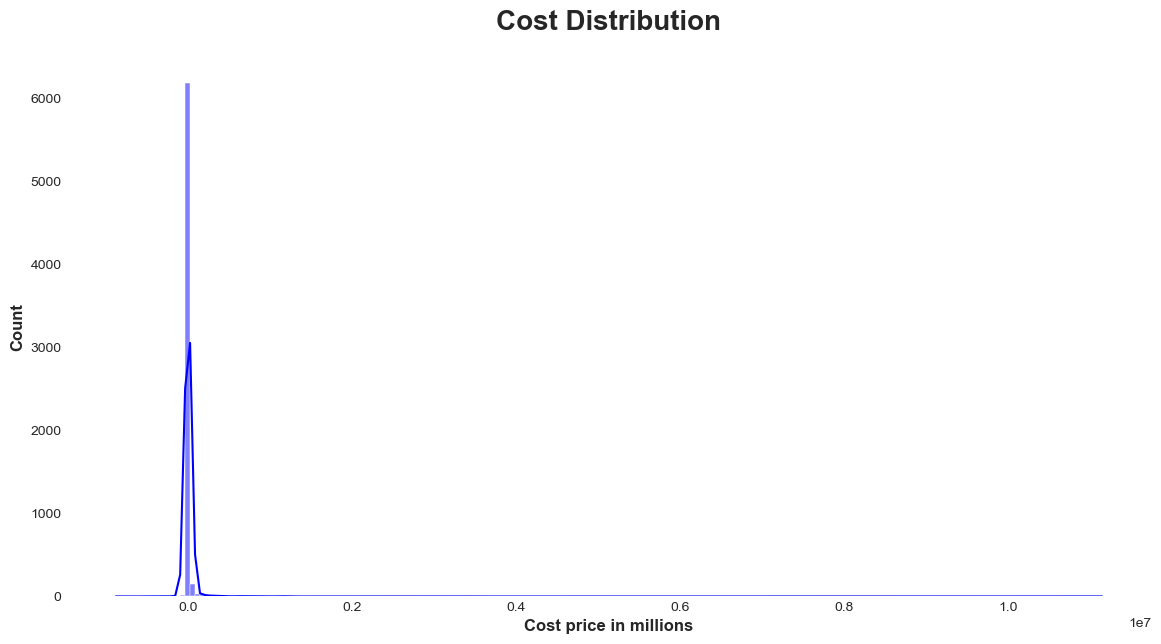

In [45]:
plt.subplots(figsize=(14,7))
sns.histplot(data['Cost'], bins=200, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.show() 

In [46]:
df1['Cost'] = np.log1p(df1['Cost']) 

(array([1973., 1985.,  954.,  461.,  223.,  127.,   64.,   32.,   16.,
           6.]),
 array([ 4.46671239,  5.64267721,  6.81864203,  7.99460685,  9.17057167,
        10.34653649, 11.5225013 , 12.69846612, 13.87443094, 15.05039576,
        16.22636058]),
 <BarContainer object of 10 artists>)

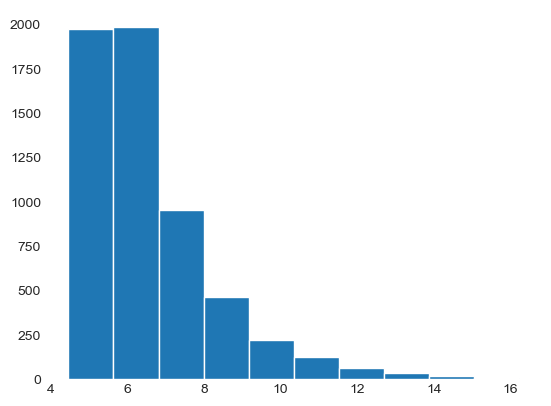

In [47]:
plt.hist(df1['Cost']) 

# Feature Engineering

### Feature Creation for Date Columns

In [48]:
data.head() 

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,year,month
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-07-06,2015-03-06,"New Michelle, OH 50777",-283.29,2015,7
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-06-03,2017-05-03,"New Michaelport, WY 12072",-159.96,2017,6
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-09-03,2015-08-03,"Bowmanshire, WA 19241",-154.29,2015,9
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16,2015,5
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23,2016,12


In [49]:
num_cols.append('Month')
num_cols.append('Year')
num_cols 

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Cost',
 'Month',
 'Year']

### Dropping Unnecessary columns

In [50]:
to_drop_columns = ['Customer Id', 'Artist Name', 'Customer Location', 'Scheduled Date', 'Delivery Date']
data.drop(columns=to_drop_columns, inplace=True) 

### Train-Test Split

In [51]:
X = data.drop(columns=['Cost'], axis=1)
y = np.abs(data['Cost'])
y = np.log1p(y) 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### Feature Encoding and Scaling

Selecting Numerical and Categorical Features for feature scaling

In [53]:
num_cols = ['Artist Reputation','Height','Width','Weight','Price Of Sculpture','Base Shipping Price','month','year']  

In [54]:
numeric_features = [x for x in num_cols if x not in outlier_feature]
categorical_features = [x for x in categorical_cols if x not in to_drop_columns]

(numeric_features), (categorical_features), (outlier_feature)

(['Artist Reputation',
  'Height',
  'Width',
  'Base Shipping Price',
  'month',
  'year'],
 ['Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location'],
 ['Price Of Sculpture', 'Weight'])

In [55]:
numeric_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

categorical_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder()),
]
)

outliers_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(standardize=True))
])

preprocessor = ColumnTransformer(
    [
        ("Numeric Pipeline",numeric_features_pipeline, numeric_features),
        ("Categorical Features Pipeline",categorical_features_pipeline, categorical_features),
        ("Outliers Features Pipeline", outliers_features_pipeline, outlier_feature)
]
)

In [56]:
data.head() 

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,year,month
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,-283.29,2015,7
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,-159.96,2017,6
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,-154.29,2015,9
3,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,-161.16,2015,5
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,-159.23,2016,12


In [57]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test) 

# Model Selection

We compare various classification models and choose top 4 models with highest accuracy score and proceed with hyperparameter tuning

In [58]:
# functions which takes true and predicted values to calculate metrics
def evaluate_reg(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square 

In [59]:
# Initialize models required for model
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False, max_depth=5),
    "AdaBoost Regressor": AdaBoostRegressor(), 
    "SVR": SVR()
} 

In [60]:
# function which can evaluate models and return a report 
def evaluate_models(X_train, X_test, y_train, y_test, models):

    models_list = []
    r2_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate Train and Test dataset
        model_train_mae , model_train_rmse, model_train_r2 = evaluate_reg(y_train, y_train_pred)

        model_test_mae , model_test_rmse, model_test_r2 = evaluate_reg(y_test, y_test_pred)


        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)

        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score']).sort_values(by=['r2_score'], ascending=False)
        
    return report 

In [61]:
base_report = evaluate_models(X_train, X_test, y_train, y_test, models) 

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.7357
- Mean Absolute Error: 0.4976
- R2 Score: 0.8014
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6960
- Mean Absolute Error: 0.4840
- R2 Score: 0.8220


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5717
- Mean Absolute Error: 0.3654
- R2 Score: 0.8801
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6367
- Mean Absolute Error: 0.4169
- R2 Score: 0.8511


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5221
- Mean Absolute Error: 0.3234
- R2 Score: 0.8999


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1246
- Mean Absolute Error: 0.0795
- R2 Score: 0.99

In [62]:
base_report 

,Model Name,r2_score
5,CatBoosting Regressor,0.972704
4,XGBRegressor,0.962014
3,Random Forest Regressor,0.955566
7,SVR,0.912621
2,Decision Tree,0.899865
6,AdaBoost Regressor,0.859392
1,K-Neighbors Regressor,0.851084
0,Linear Regression,0.822045


# Hyperparameter Tuning

In [63]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

cat_params = {"learning_rate": [0.1, 0.01, 0.6, 0.5],
              "max_depth": [4, 5, 6, 8, 12]} 

In [64]:
# Models list for Hyperparameter tuning
randomcv_models = [("RF", RandomForestRegressor(), rf_params),
                   ('XGBoost', XGBRegressor(), xgboost_params),
                   ('CatBoost', CatBoostRegressor(verbose=False), cat_params)
                   ] 

In [65]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name]) 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
---------------- Best Params for CatBoost -------------------
{'max_depth': 4, 'learning_rate': 0.1}


In [66]:
# reInitialize models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF'], n_jobs=-1),
    "XGBRegressor": XGBRegressor(**model_param['XGBoost'], n_jobs=-1), 
     "CatBoosting Regressor": CatBoostRegressor(**model_param['CatBoost'],verbose=False)
}

In [67]:
retrained_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1466
- Mean Absolute Error: 0.0894
- R2 Score: 0.9921
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3674
- Mean Absolute Error: 0.2288
- R2 Score: 0.9504


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.1420
- Mean Absolute Error: 0.0901
- R2 Score: 0.9926
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2893
- Mean Absolute Error: 0.1663
- R2 Score: 0.9692


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1762
- Mean Absolute Error: 0.1139
- R2 Score: 0.9886
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2837
- Mean Absolute Error: 0.1607
- R2 Score: 0.9704




In [68]:
retrained_report 

,Model Name,r2_score
2,CatBoosting Regressor,0.970435
1,XGBRegressor,0.969247
0,Random Forest Regressor,0.950414


Best Model is CatBoost Regressor with 97.04% Score